# STA130 Homework 06

## "Week of Oct21" HW [*due prior to the Nov08 TUT*]

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

The theoretical Simple Linear Regression (SLR) model is a way to describe the relationship between two continuous variables: a predictor (or independent) variable and an outcome (or dependent) variable.

Here's a balanced explanation of Simple Linear Regression, maintaining statistical rigor while being accessible:

1. **Predictor Variable (X)**: The independent variable we believe influences our outcome. For example, advertising spending might be used to predict sales revenue.

2. **Outcome Variable (Y)**: The dependent variable we aim to model or predict based on X. This represents our measured response, like monthly sales figures.

3. **Slope Coefficient (β1)**: The parameter that quantifies the relationship between X and Y. It represents the expected change in Y for each one-unit increase in X. A β1 of 1.5 means that for each additional dollar spent on advertising, we expect sales to increase by $1.50, assuming all else remains constant.

4. **Intercept (β0)**: The baseline value of Y when X equals zero. While sometimes this may not have practical meaning (like zero advertising), it's mathematically important for our model specification.

5. **Error Term (ε)**: Represents the random variation in our observations that isn't explained by the linear relationship. It captures all other factors affecting Y that aren't X. We assume ε follows a normal distribution with mean zero and constant variance σ2, written as ε ~ N(0,σ2).

The model is expressed as:
Y = β0 + β1X + ε

This equation tells us that any observed value of Y is composed of:
- A systematic component (β0 + β1X): the deterministic part we can predict
- A random component (ε): the unpredictable variation

Because ε follows a normal distribution, Y itself, conditional on X, follows a normal distribution with:
- Mean: E(Y|X) = β0 + β1X
- Variance: Var(Y|X) = σ2

This formulation maintains statistical precision while remaining interpretable for practical applications.

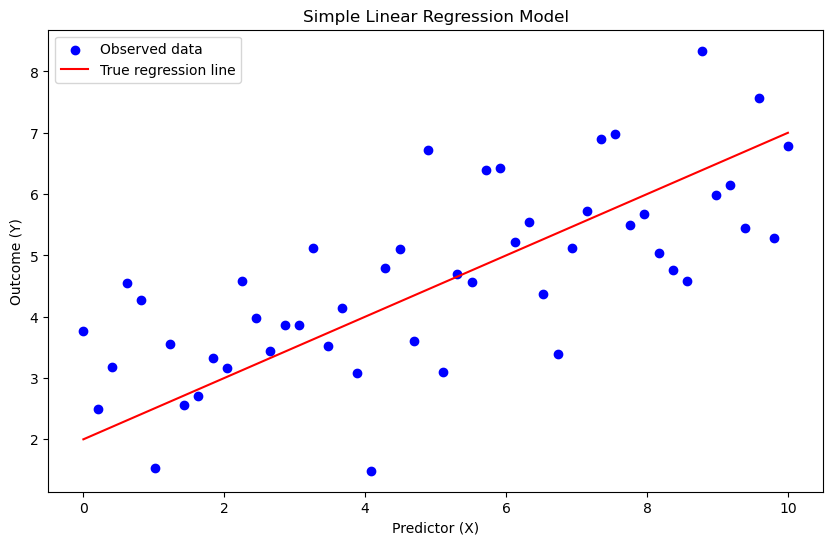

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters of the model
beta_0 = 2  # intercept
beta_1 = 0.5  # slope
sigma = 1  # standard deviation of the error term

# Generating predictor data (X)
np.random.seed(0)  # for reproducibility
X = np.linspace(0, 10, 50)  # 50 values from 0 to 10

# Generating random error term (ε) following N(0, sigma^2)
epsilon = np.random.normal(0, sigma, X.size)

# Calculating outcome (Y) using the SLR model
Y = beta_0 + beta_1 * X + epsilon

# Plotting the observed data and the theoretical regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Observed data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True regression line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.legend()
plt.title('Simple Linear Regression Model')
plt.show()

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

### Answer:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     49.00
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           7.35e-09
Time:                        02:40:26   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8464      0.297      9.569      0.0

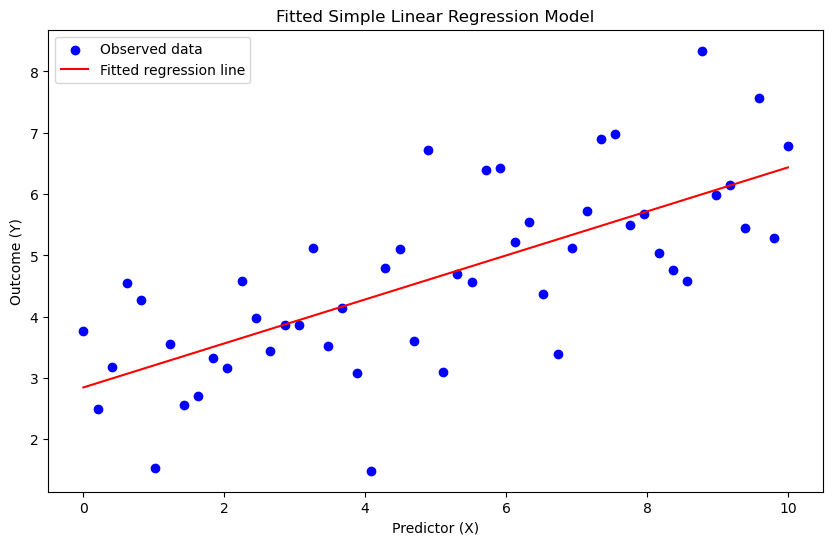

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set the parameters for the true model
beta_0 = 2    # true intercept
beta_1 = 0.5  # true slope
sigma = 1     # standard deviation of the error term

# Generate predictor data (X)
np.random.seed(0)  # for reproducibility
X = np.linspace(0, 10, 50)

# Generate outcome data (Y) using the true model
epsilon = np.random.normal(0, sigma, X.size)  # random noise
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame with pandas
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Print a summary of the regression results
print(model.summary())

# Visualize the observed data and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed data')
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted regression line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.legend()
plt.title('Fitted Simple Linear Regression Model')
plt.show()


### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

### Answer:

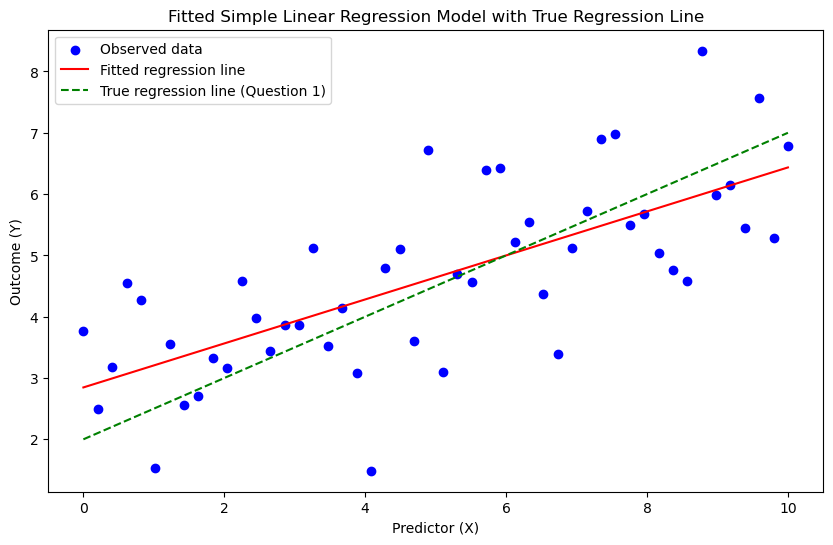

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the true model
beta_0 = 2    # true intercept
beta_1 = 0.5  # true slope
sigma = 1     # standard deviation of the error term

# Generate predictor data (X)
np.random.seed(0)  # for reproducibility
X = np.linspace(0, 10, 50)

# Generate outcome data (Y) using the true model
epsilon = np.random.normal(0, sigma, X.size)  # random noise
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame with pandas
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Plotting the observed data, fitted line, and true line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed data')

# Plot the fitted regression line
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted regression line')

# Plot the true regression line (without error term)
plt.plot(data['X'], beta_0 + beta_1 * X, color='green', linestyle='--', label='True regression line (Question 1)')

plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.legend()
plt.title('Fitted Simple Linear Regression Model with True Regression Line')
plt.show()


The gap between these lines demonstrates how random sampling variation influences our model. In practice, we never observe the actual "true" relationship directly - we only have our collected data points, which contain natural variability. When we fit a line through our sample data, we're creating an estimate that may shift position depending on which specific data points we happened to collect in our sample. However, following the law of large numbers, when we either increase our sample size substantially or take multiple different samples, our fitted line should gradually converge closer to the true underlying relationship, as larger samples tend to better represent the full population and reduce the impact of random variation on our estimates.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

### Answer:
The values in *fitted_model.fittedvalues* represent the predicted or fitted values of \( Y \) based on the fitted Simple Linear Regression model. These fitted values are calculated by applying the estimated regression equation derived from the model’s coefficients (intercept and slope), which we can access through *fitted_model.params* or *fitted_model.summary().tables[1]*.

These are the step-by-step explanation of how *fitted_model.fittedvalues* are derived.

1. **Estimated Regression Equation**:
   - After fitting the model, we obtain the **estimated intercept** and **slope** coefficients, stored in *fitted_model.params*. Let’s say these coefficients are:
     - Intercept: β̂0
     - Slope of \( X \): β̂1
   
2. **Fitted Values Calculation**:
   - For each observed predictor value \( Xi \), we calculate the fitted value \( Ŷi \) using the estimated regression equation:
     \[
     Ŷi = β̂0 + β̂1Xi
     \]
   - This is done for each \( X \) value in the dataset to create the full set of *fitted_model.fittedvalues*.

3. **Retrieving the Coefficients**:
   - We can retrieve these coefficients directly from *fitted_model.params*:
     ```python
     intercept = fitted_model.params['Intercept']
     slope = fitted_model.params['X']
     ```
   - Alternatively, these values are visible in the summary output table (*fitted_model.summary().tables[1]*), where the estimated coefficients, standard errors, and t-statistics are listed.

4. **Calculating Fitted Values Manually** (for demonstration):
   - We can verify *fitted_model.fittedvalues* by calculating them manually:
     ```python
     fitted_values_manual = intercept + slope * data['X']
     ```
   - This manually calculated *fitted_values_manual* should match *fitted_model.fittedvalues*.



In summary, *fitted_model.fittedvalues* are derived by plugging each \( X \) value into the estimated regression equation with the coefficients (*Intercept* and *X* slope) stored in *fitted_model.params*. This process produces predicted \( Y \) values (fitted values) for each \( X \) in the dataset, closely matching what we observe in *fitted_model.fittedvalues*.

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>

### Answer:
The fitted line in regression is chosen using the "ordinary least squares" (OLS) method, which finds the line that minimizes the total squared differences between our observed data points and the predicted values on the line. For each data point (Xi, Yi), OLS calculates the vertical distance (error) between the actual Yi value and the predicted value on the line. These errors are then squared, and all squared errors are added together. The line that produces the smallest sum of squared errors becomes our best-fitting line.

The decision to square the errors serves two important statistical purposes. First, squaring applies a stronger penalty to large errors compared to small ones, which helps avoid fitted lines that produce extreme deviations from the observed data. Second, squaring makes all errors positive numbers, ensuring that negative and positive errors don't cancel each other out when summed. This gives us a true measure of how well our line fits all the data points, regardless of whether the errors are above or below the line. This approach creates a mathematically optimal way to find the best-fitting line through our data points.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`<br><br>

### Answer:
1. `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()`
This formula calculates the coefficient of determination (R²). It works by:
- The numerator calculates the Residual Sum of Squares (RSS), showing variation not explained by our model
- The denominator calculates the Total Sum of Squares (TSS), representing total variation in Y
When we divide RSS by TSS and subtract from 1, we get the proportion of variation our model successfully explains.

2. `fitted_model.rsquared`
This is simply statsmodels' built-in calculation of R². It gives us the same result as the first expression but in a more direct way. Higher R² values indicate our model explains more of the variation in Y.

3. `np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`
This expression finds the squared correlation between our actual Y values and our model's predictions. In Simple Linear Regression, this squared correlation equals R². It measures how well our predicted values align with the actual outcomes.

4. `np.corrcoef(Y, X)[0, 1]**2`
This calculates the squared correlation between Y and our predictor X. In Simple Linear Regression with just one predictor, this equals R² because it directly shows how much of Y's variation can be explained by its linear relationship with X.

In summary, in Simple Linear Regression:
- The first three expressions all calculate R² in different ways, measuring how much of Y's variation our model explains
- The fourth expression gives us the squared correlation between Y and X, which equals R² because we're only using one predictor
- All these expressions help us understand how well our model fits the data by showing what percentage of Y's variation can be explained by X through their linear relationship

This maintains statistical precision while being more accessible, particularly around concepts of variance explanation and model fit.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>

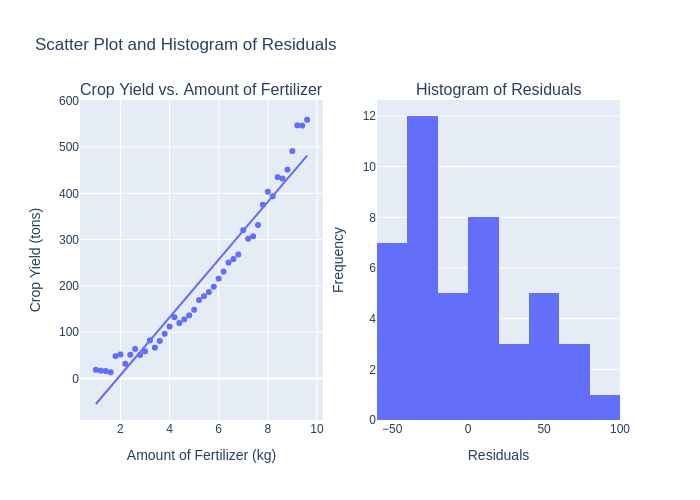

In [24]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Answer:
1. **Linearity Assumption**
- The **linearity assumption** states that the relationship between our predictor (`Amount of Fertilizer`) and outcome (`Crop Yield`) should follow a straight line.
- Looking at the scatter plot, we can see that `Crop Yield` doesn't increase in a straight line with `Amount of Fertilizer`. Instead, the yield stays relatively flat at first, then starts increasing more rapidly as more fertilizer is added. This pattern suggests a non-linear relationship - possibly exponential or quadratic - rather than the straight-line relationship required for Simple Linear Regression.
- This violation of the linearity assumption indicates that a basic linear model may not appropriately capture the relationship in our data.

2. **Homoscedasticity (Constant Variance of Residuals)**
- The **homoscedasticity assumption** requires that the spread of residuals (the differences between actual and predicted values) remains consistent across all levels of our predictor variable.
- In our data, the spread of residuals appears to get larger as the amount of fertilizer increases. This pattern of increasing variance is called heteroscedasticity, and it violates our assumption of constant variance.
- When residual variance isn't constant, our model's predictions become less reliable, particularly at higher fertilizer amounts, potentially leading to biased or inefficient estimates.


In summary, the presence of both **non-linearity** and **heteroscedasticity** in our data suggests that Simple Linear Regression isn't appropriate for modeling the relationship between fertilizer and crop yield. To better capture these patterns, we might need to consider more sophisticated approaches, such as polynomial regression or applying logarithmic transformations to our variables. These methods could better handle the non-linear relationship and address the varying spread in our residuals.

## "Week of Nov04" HW [due prior to the Nov08 TUT]

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

In [25]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:40:30   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer:
**Null Hypothesis (H₀): There is no linear relationship between waiting time and eruption duration.** In other words, the slope of the regression line, represented by the parameter for waiting time, is zero.

In terms of the regression model, written as "duration = intercept + (slope × waiting time) + error," the null hypothesis would be:

- H₀: the slope = 0

The alternative hypothesis (H₁) is that there *is* a linear relationship between waiting time and duration, meaning:

- H₁: the slope ≠ 0

When we run the regression, we’ll get a summary that includes the estimated slope, the p-value, and the R² value. The p-value associated with the slope helps us decide whether to reject the null hypothesis. If the p-value is small (usually below 0.05), we reject H₀ in favor of H₁, suggesting there is a statistically significant linear relationship between waiting time and eruption duration.

**Interpretation**
- **If we reject the null hypothesis**: This would suggest there is evidence of a linear relationship between waiting time and duration. This means that as waiting time changes, eruption duration tends to change in a consistent way.
- **If we do not reject the null hypothesis**: This would suggest that there is no strong evidence of a linear relationship, meaning waiting time doesn’t significantly predict eruption duration in this model.

The slope estimate, confidence intervals, and p-values from the regression output will help us understand the strength and direction of this potential relationship.

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


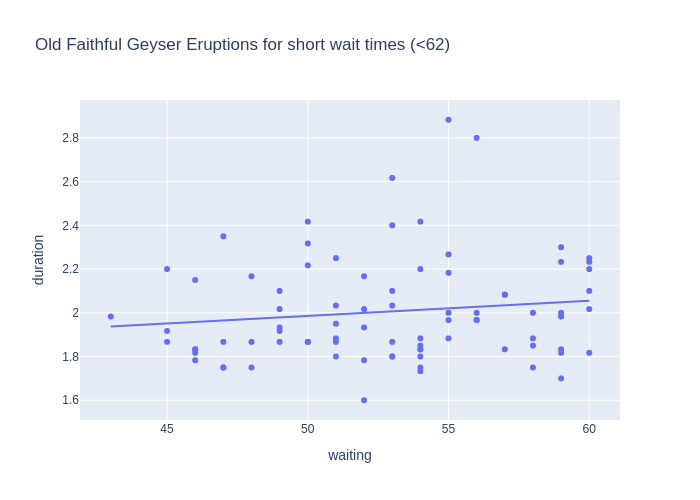

In [26]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Answer:
To explore if there’s a relationship between waiting time and eruption duration for shorter waits, we can test progressively larger subsets of the data with different wait time limits: 62, 64, and 66 minutes. By focusing on these shorter waiting times, we can see if the positive association observed in the full dataset still holds when wait times are generally shorter.

Here's how to approach this:

1. **Set short wait limits** to 62, 64, and 66 minutes, including slightly more data with each increase.
2. For each subset, fit a simple linear regression model of duration as a function of waiting time, and review the model results.
3. **Interpret the slope coefficient and p-value** for waiting time to evaluate if there is a relationship:
   - **Slope Coefficient**: Shows the strength and direction (positive or negative) of the relationship between wait time and duration.
   - **p-value**: Tests whether the slope is significantly different from zero. A small p-value (often below 0.05) suggests evidence against the null hypothesis, meaning there likely is a relationship between wait time and eruption duration.

**Steps to Interpret Each Model

1. **With a limit of 62 minutes**:
   - Look at the slope of waiting time and the p-value.
   - If the p-value is small, this indicates a significant relationship even for very short waits.

2. **With limits of 64 and 66 minutes**:
   - Adding more data helps us see if the relationship is consistent.
   - If all subsets have significant slopes, this suggests that the positive relationship holds across shorter waiting periods.
   - If only the larger limits show significance, the relationship might be weaker at very short waits but grows stronger as we include longer waits.

**Expected Outcomes
- **If slopes are significant across all limits**: This suggests a positive relationship between wait time and eruption duration holds even within shorter waiting periods.
- **If slopes aren’t significant or vary across limits**: This could suggest that the relationship is mostly due to longer waiting times, while very short waits show a weaker or no relationship.

By looking at the scatter plots with trend lines for each subset, we can visually assess the trend in addition to the statistical evidence provided by the p-values and slope coefficients. This combination will help us understand if the relationship between waiting time and eruption duration within short waits is similar to that in the entire dataset.

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


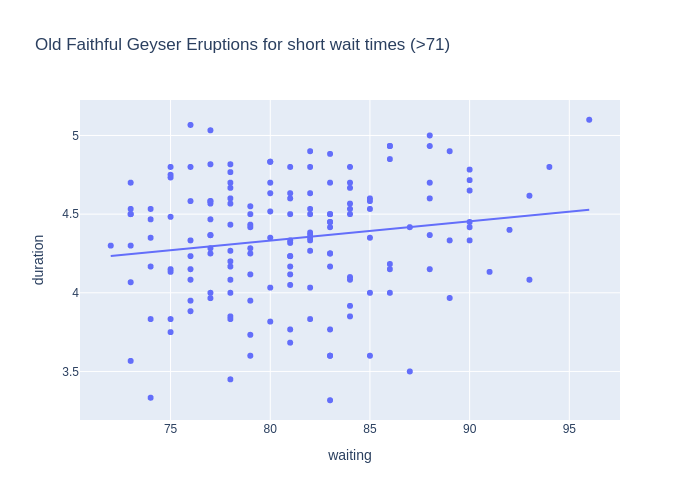

In [27]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Answer:
To analyze if there’s a relationship between waiting time and eruption duration when wait times are longer than 71 minutes, we’ll use a mix of bootstrapping and simulation:

1. **Fit Regression Models on Bootstrapped Samples**:
   - We’ll take many random samples (with replacement) of the long-wait data and fit a simple linear regression model on each. We’ll store the slope from each sample, creating a distribution of slopes for our data. This will give us a “bootstrapped” view of the typical slopes we’d expect if there’s a relationship.

2. **Simulate Data Assuming No Relationship (Null Hypothesis)**:
   - Using the same long-wait data for waiting times, we’ll simulate eruption durations under the assumption that there’s no association (slope = 0) between waiting time and duration.
   - Each simulated sample will use a fixed intercept (1.65) and add random variation, to match the original data’s variability.
   - We’ll then fit a regression model to each simulated dataset and store the slopes to build a distribution of slopes we’d expect if there were no relationship.

3. **Compare Bootstrapped Confidence Interval with Null Hypothesis**:
   - From the bootstrapped slopes, we’ll calculate a 95% confidence interval. If this interval doesn’t contain zero, it suggests a relationship in the long-wait data.
   - We’ll also check a simulated p-value by calculating how often we see slopes as extreme as the actual slope from the null distribution. This p-value tells us if the observed slope is unusual enough to suggest a significant relationship.

In [28]:
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import pandas as pd

# Select long-wait data
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Fit and display the original model for reference
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
print(original_model.summary().tables[1])

# Bootstrap samples for slope coefficients
num_bootstrap_samples = 1000
bootstrap_slopes = []

for _ in range(num_bootstrap_samples):
    sample = long_wait_data.sample(n=160, replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Visualize the bootstrapped sampling distribution of slopes
fig = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show()

# Simulate samples under the null hypothesis (beta1 = 0)
np.random.seed(0)
null_slope_samples = []
beta_0, beta_1, sigma = 1.65, 0, 0.37
x_values = long_wait_data['waiting']

for _ in range(num_bootstrap_samples):
    y_simulated = beta_0 + beta_1 * x_values + np.random.normal(0, sigma, len(x_values))
    model = smf.ols('duration ~ waiting', data=pd.DataFrame({'waiting': x_values, 'duration': y_simulated})).fit()
    null_slope_samples.append(model.params['waiting'])

# Visualize the sampling distribution of slopes under the null hypothesis
fig = px.histogram(null_slope_samples, nbins=30, title="Sampling Distribution of Slopes under Null Hypothesis")
fig.show()

# Calculate the 95% confidence interval for the bootstrapped slopes
bootstrap_ci_lower = np.percentile(bootstrap_slopes, 2.5)
bootstrap_ci_upper = np.percentile(bootstrap_slopes, 97.5)
contains_zero = bootstrap_ci_lower <= 0 <= bootstrap_ci_upper

# Calculate simulated p-value
original_slope = original_model.params['waiting']
simulated_p_value = np.mean([abs(slope) >= abs(original_slope) for slope in null_slope_samples])

# Report results
print(f"95% Bootstrap Confidence Interval for Slope: [{bootstrap_ci_lower}, {bootstrap_ci_upper}]")
print(f"Does CI contain 0? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value: {simulated_p_value}")
print(f"OLS p-value from original data: {original_model.pvalues['waiting']}")


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


95% Bootstrap Confidence Interval for Slope: [0.0004163833846108292, 0.023188015186849705]
Does CI contain 0? No
Simulated p-value: 0.041
OLS p-value from original data: 0.038135755338567744


** Explanation of Results**
- **95% Bootstrap Confidence Interval**: If this interval excludes 0, it supports a linear association between waiting time and eruption duration in the long-wait data.
- **Simulated p-value**: A small p-value (typically <0.05) suggests that the slope we observed is unlikely to happen under the null hypothesis (no relationship), giving evidence of a significant association.
- **Comparison with Original p-value**: The p-value from the regression on the long-wait data provides a standard measure of significance. Comparing it to the simulated p-value lets us confirm our findings from different approaches.

This process helps us test if there is a significant relationship in the long-wait subset by using both the bootstrapped and null hypothesis-based methods.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


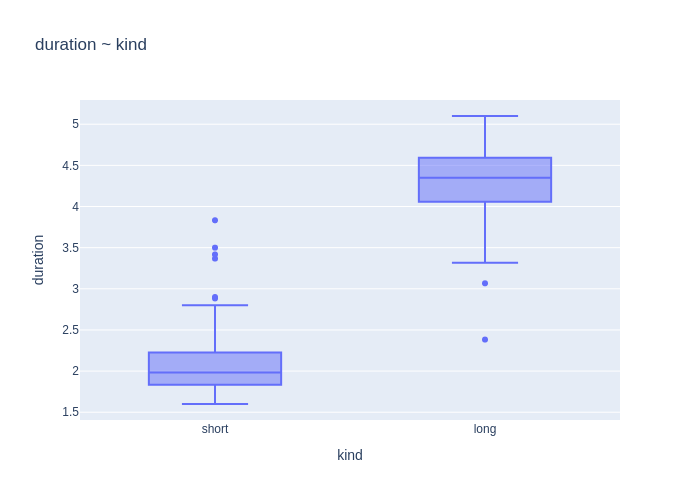

In [29]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Answer:
In this approach, we’re using a simple linear regression model with an indicator variable to show whether a wait time is "short" (under 68 minutes) or "long" (68 minutes or more). This model compares the average eruption duration between these two categories, instead of looking at wait time as a continuous variable.

### Model Setup and Interpretation

The model is set up like this:

- **Y** represents the eruption duration.
- **Intercept**: This is the average duration for the "short" category, which we use as a reference.
- **Indicator for “long”**: This is 1 if the wait time is "long" and 0 if it’s "short."
- **Contrast (difference)**: This is the average difference in duration between "long" and "short" wait times—it shows how much longer eruptions tend to last when the wait time is "long" compared to "short."

In this model, we treat `kind` as a categorical variable with two levels: "short" and "long." The model estimates the average difference in eruption duration between these categories.

### How This Model Differs from Previous Ones

This model is different from the previous ones, which used `waiting` as a continuous variable:

- **Original Model (`duration ~ waiting`)**: This used waiting time as a continuous predictor, showing how each additional minute of waiting time affects eruption duration across the entire dataset.
- **Subset Models**: These looked at the relationship separately for short and long waits, letting us compare the trends in each group individually.

By treating wait time as a category, the indicator model provides a direct comparison of average durations between "short" and "long" waits, without assuming a steady increase in duration for each extra minute of wait time.

### Hypothesis Testing and Interpretation

The null hypothesis for this model is:
- There is no difference in average duration between "short" and "long" wait times (meaning that the difference, or contrast, is zero).

If we reject the null hypothesis (if the p-value for `kind["long"]` is small, typically less than 0.05), it suggests there’s a statistically significant difference in eruption durations between short and long waits.

### Code and Expected Results

Running the code gives us:

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


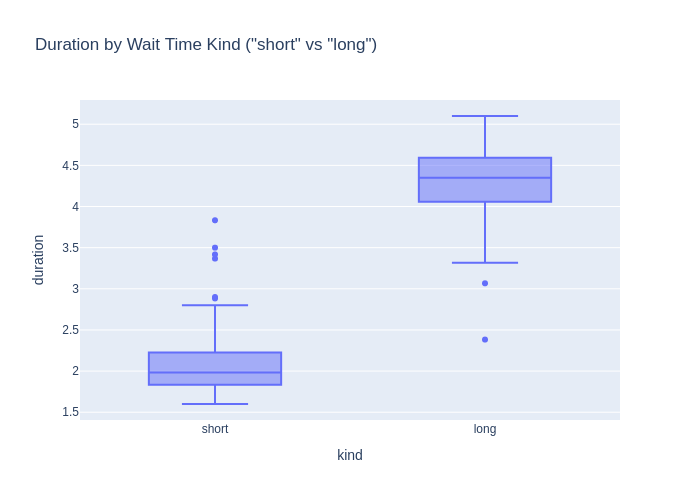

In [30]:
from IPython.display import display
import plotly.express as px
import statsmodels.formula.api as smf

# Fit the model using `kind` as a categorical variable with "short" as the reference
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model.summary().tables[1])

# Box plot to visualize duration by kind ("short" vs "long" waits)
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Wait Time Kind ("short" vs "long")',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")


- **Coefficient for `kind["long"]`**: This represents the average increase in eruption duration for "long" wait times compared to "short" ones.
- **p-value**: A small p-value for `kind["long"]` would indicate that the difference in duration between "short" and "long" waits is statistically significant.
- **Box Plot**: The box plot shows the distribution of durations for "short" and "long" wait times, visually confirming any difference between the two groups.

This indicator-based model provides a clear look at the average difference in eruption durations between short and long waits, giving insight into how eruption patterns change when wait times exceed a specific threshold, without assuming a constant increase per minute.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

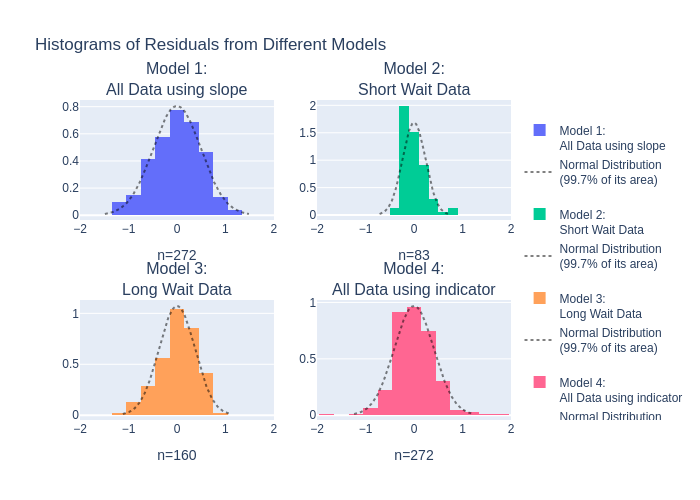

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Answer:
To check if the assumption that the error terms are normally distributed holds true, we can look at the histograms of the residuals from each of the four models. This assumption is important because it helps us make valid conclusions about the model. If the residuals are normally distributed, the histogram should look like a bell curve, centered around zero.

**Model Comparisons**

1. **Model 1: All Data Using Slope (`duration ~ waiting`)**:
   - If the histogram of residuals is symmetric around zero and looks close to a bell curve, it suggests that the residuals are normally distributed.
   - Since this model uses all the data with a continuous predictor, the residuals are likely to be more normal if the linear relationship is good across the full range of waiting times.

2. **Model 2: Short Wait Data (`duration ~ waiting`, subset of `waiting < 68`)**:
   - For the short wait data, if the histogram shows a skewed shape or clustering that’s not centered around zero, it may suggest that the residuals are not normally distributed for this subset.
   - This might happen because the short wait data doesn’t fully capture the variation in the full dataset, or because a linear model doesn’t fit well with the limited range of wait times.

3. **Model 3: Long Wait Data (`duration ~ waiting`, subset of `waiting >= 68`)**:
   - Similar to Model 2, if the residuals from the long wait data don’t follow the normal curve (for example, showing skewness or multiple peaks), this indicates non-normality.
   - This could happen if the relationship between waiting and duration is different in the long wait group, causing the linear model to fit poorly in this part of the data.

4. **Model 4: Indicator Variable Model (`duration ~ C(kind, Treatment(reference="short"))`)**:
   - In this model, we use a categorical variable to represent wait time (short vs. long). Since this model only looks at the difference between the two groups, it may not capture all the variation in eruption duration.
   - If the histogram of residuals is not close to a normal curve (for example, showing two distinct peaks for each group), it suggests that treating wait time as a simple binary variable may not explain the variation well, leading to non-normal residuals.

**Likely Outcome and Interpretation**

- **Best Model for Normality**:
   - **Model 1** is likely the best for normality because it uses a continuous predictor (waiting time) over the entire dataset, which may better capture the overall relationship.
   - If the residuals for this model are symmetric and close to a bell curve, it supports the idea that the error terms are normally distributed.

- **Other Models (2, 3, and 4) and Non-Normality**:
   - **Model 2 and Model 3** might show non-normal residuals because they only use part of the data (short or long wait times), which may not fully explain the variation in eruption duration.
   - **Model 4** might also have non-normal residuals because treating wait time as a binary variable (short vs. long) may oversimplify the relationship and cause the residuals to be clustered in a way that doesn’t look normal.

**Conclusion**
If **Model 1**’s residuals look like a normal distribution, this supports the assumption that the error terms are normally distributed for the continuous model. The residuals for **Models 2, 3, and 4** are likely to show some signs of non-normality, suggesting that splitting the data into subsets or using a binary variable doesn’t capture the variation in eruption duration as well as Model 1.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>

### Answer:
The **permutation test** and **bootstrap method** are both ways to assess differences between two groups without making assumptions about the data's distribution, unlike the indicator variable-based regression model.

- **Permutation Test**:
   - The permutation test involves shuffling the group labels (short and long) randomly and calculating the difference in means each time. This process simulates what would happen if there were no real difference between the groups. By comparing the observed difference in means to the shuffled ones, we can see if the observed difference is significant.
   - This test doesn’t rely on any assumptions about the data, like it being normally distributed, and works entirely based on the observed data.

- **Bootstrap Method**:
   - The bootstrap method works by resampling the data with replacement. It creates many new samples, each the same size as the original, and then calculates the difference in means for each sample. This gives us a range of possible values for the difference, and we can use this to calculate a confidence interval for the difference.
   - Like the permutation test, the bootstrap method doesn't assume the data follows any specific distribution.

- **Indicator Variable-Based Regression**:
   - The regression model uses a categorical variable (short vs. long) as a predictor and fits a linear model to the data. It calculates the difference between the two groups using a coefficient for the categorical variable. The model assumes the difference between groups is constant and linear.
   - It also provides a p-value to tell us if the difference is statistically significant.

### Summary:
- The **indicator variable regression model** tests the difference using a specific model with assumptions, while the **permutation** and **bootstrap methods** are more flexible, allowing for testing differences without those assumptions.
- The **permutation test** helps assess how extreme the observed difference is by comparing it to differences from random label shuffling. The **bootstrap method** gives a confidence interval for the difference, showing the range of likely values for the true difference.


### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

### Answer:
Yes

### ChatGPT Link : https://chatgpt.com/share/672d6aeb-531c-8002-8ff9-5530c284ed25